In [24]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("C:\\Users\\haier\\Python\\TEXT_DATA_PREPROCESSING\\Data_sets\\subset_covid19_tweets.csv")

In [26]:
a = df['user_followers'].describe()
b = df['user_favourites'].describe()
c = df['user_friends'].describe()

In [27]:
a

count    5.000000e+02
mean     8.285120e+04
std      7.113861e+05
min      0.000000e+00
25%      1.717500e+02
50%      8.410000e+02
75%      4.770250e+03
max      1.389280e+07
Name: user_followers, dtype: float64

In [28]:
b

count       500.000000
mean      11229.806000
std       31756.974694
min           0.000000
25%         147.000000
50%        1713.000000
75%        9773.250000
max      488878.000000
Name: user_favourites, dtype: float64

In [29]:
c

count       500.000000
mean       2562.412000
std       12563.676522
min           0.000000
25%         165.500000
50%         558.500000
75%        1617.500000
max      256510.000000
Name: user_friends, dtype: float64

In [30]:
drop_unnamed = df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.index.name = 'S:no'  ; df.columns.name = 'Info'
df_rename = df.rename(columns=str.title)
fill_with_method = df.fillna(method='ffill',inplace=True) #this method keep pervious of column-value and past where na is writhen  

In [6]:
fill_with_values = df.fillna({'hashtags':'Zero'},inplace=True)

In [7]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_numeric)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        df[list_of_c_id] = df[list_of_c_id].astype(int)
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [8]:
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [9]:
df.dtypes

Info
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int32
user_friends         int32
user_favourites      int32
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [10]:
data = df.describe()

In [32]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        #histogram
        sns.distplot(df[list_var])

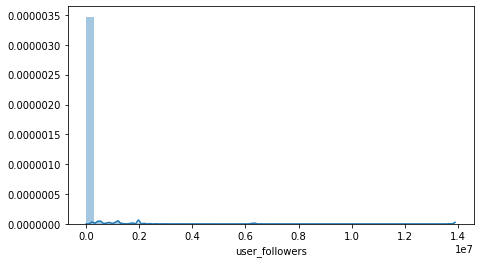

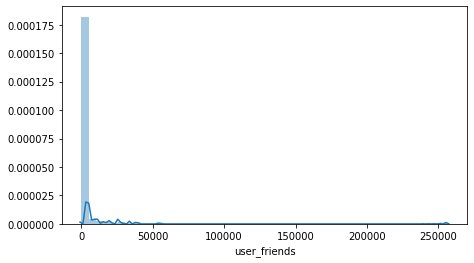

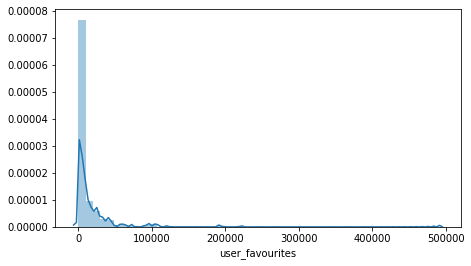

In [33]:
plotvariable(df,['user_followers', 'user_friends', 'user_favourites'])

In [34]:
def get_boundary_value(list_c_ids):
    for list_c_id in list_c_ids:
        print('\n',list_c_id.upper())
        global  upper_limmite, lower_limmite
        upper_limmite = df[list_c_id].mean() + 3*df[list_c_id].std()
        lower_limmite = df[list_c_id].mean() - 3*df[list_c_id].std()
        print('Highest Allow',list_c_id.upper(),upper_limmite)
        print('Lowest Allow',list_c_id.upper(),lower_limmite)

In [35]:
get_boundary_value(['user_followers','user_friends','user_favourites'])


 USER_FOLLOWERS
Highest Allow USER_FOLLOWERS 2217009.4673213637
Lowest Allow USER_FOLLOWERS -2051307.0673213636

 USER_FRIENDS
Highest Allow USER_FRIENDS 40253.441566993046
Lowest Allow USER_FRIENDS -35128.61756699305

 USER_FAVOURITES
Highest Allow USER_FAVOURITES 106500.73008202063
Lowest Allow USER_FAVOURITES -84041.11808202064


In [36]:
def get_np_where(list_c_ids):
    for list_c_id in list_c_ids:
        if list_c_id == 'user_followers':
            #np.where(required 3 things . 1)condition 2)action when given condition True 3)action when given condition False) 
            np.where(df[list_c_id] > upper_limmite,#condition
                    upper_limmite,#if condition is true replace with upper limmit
                     np.where(df[list_c_id] < lower_limmite, # if condition is false
                             lower_limmite,#replace by lowwer
                              df[list_c_id]#else leave that 
                             )
                    )
        elif list_c_id == 'user_friends':
            if list_c_id == 'user_followers':
                np.where(df[list_c_id] > upper_limmite,
                         upper_limmite,
                         np.where(df[list_c_id] < lower_limmite,
                                  lower_limmite,
                                  df[list_c_id]
                             )
                    )
            elif list_c_id == 'user_favourites':
                if list_c_id == 'user_favourites':
                    np.where(df[list_c_id] > upper_limmite,
                             upper_limmite,
                             np.where(df[list_c_id] < lower_limmite,
                                      lower_limmite,
                                      df[list_c_id]
                             )
                    )

In [42]:
get_np_where(['user_followers','user_friends','user_favourites'])

In [43]:
a = df['user_followers'].describe()
b = df['user_favourites'].describe()
c = df['user_friends'].describe()

In [44]:
a

count    5.000000e+02
mean     8.285120e+04
std      7.113861e+05
min      0.000000e+00
25%      1.717500e+02
50%      8.410000e+02
75%      4.770250e+03
max      1.389280e+07
Name: user_followers, dtype: float64

In [46]:
b

count       500.000000
mean      11229.806000
std       31756.974694
min           0.000000
25%         147.000000
50%        1713.000000
75%        9773.250000
max      488878.000000
Name: user_favourites, dtype: float64

In [47]:
c

count       500.000000
mean       2562.412000
std       12563.676522
min           0.000000
25%         165.500000
50%         558.500000
75%        1617.500000
max      256510.000000
Name: user_friends, dtype: float64